In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import json

file_path = "/content/drive/MyDrive/Cluster-proj/output/Qwen2.5-7B-hard-1-10_with_all_steps.json"

In [55]:
with open(file_path, 'r') as f:
    data = json.load(f)


In [56]:
type(data)


dict

In [57]:
data.keys()

dict_keys(['5adf44985542993a75d2646d', '5a89372855429951533612e6', '5ab381b155429969a97a816b', '5ae3b4d05542992f92d82349', '5a8efd3c55429918e830d179', '5a7a02235542996c55b2dcd3', '5ae78ec5554299540e5a5605', '5a7a52745542996c55b2dd4f', '5ac1f7f355429964131be2ae', '5a736bfa5542991f29ee2e03'])

In [58]:
id = '5adf44985542993a75d2646d'

In [59]:
data[id].keys()

dict_keys(['question', 'support_fact', 'context', 'true_ans', 'type', 'level', 'greedy', 'beam', 'sampling', 'greedy_step_token_probs', 'beam_step_token_probs', 'sampling_step_token_probs'])

In [60]:
data[id]['question']

"Which genus of moth in the world's seventh-largest country contains only one species?"

In [61]:
data[id]['true_ans']

'Crambidae'

In [62]:
data[id]['greedy_step_token_probs']

{'1': [{'token': ':', 'prob': 0.9850311279296875},
  {'token': 'Identify', 'prob': 0.799263060092926},
  {'token': 'the', 'prob': 0.9448095560073853},
  {'token': 'relevant', 'prob': 0.31613093614578247},
  {'token': 'information', 'prob': 0.8508521318435669},
  {'token': 'from', 'prob': 0.44361618161201477},
  {'token': 'the', 'prob': 0.999220609664917},
  {'token': 'context', 'prob': 0.42772790789604187},
  {'token': '.', 'prob': 0.33151471614837646},
  {'token': '-', 'prob': 0.315824955701828},
  {'token': 'India', 'prob': 0.2952859699726105},
  {'token': 'is', 'prob': 0.9072842001914978},
  {'token': 'the', 'prob': 0.7549043893814087},
  {'token': 'seventh', 'prob': 0.8891474008560181},
  {'token': '-largest', 'prob': 0.9884735941886902},
  {'token': 'country', 'prob': 0.9997736811637878},
  {'token': 'in', 'prob': 0.6566133499145508},
  {'token': 'the', 'prob': 0.9944150447845459},
  {'token': 'world', 'prob': 0.9987905621528625},
  {'token': '.', 'prob': 0.8628897666931152},
  {'

In [44]:
data[id]['support_fact']

[['Indogrammodes', 0], ['Indogrammodes', 1], ['India', 0], ['India', 1]]

In [50]:
print_context(data, id)

Indogrammodes is a genus of moths of the Crambidae family.

 It contains only one species, Indogrammodes pectinicornalis, which is found in India.

Indogrammodes is a genus of moths of the Crambidae family.

 It contains only one species, Indogrammodes pectinicornalis, which is found in India.

India, officially the Republic of India ("Bhārat Gaṇarājya"), is a country in South Asia.

 It is the seventh-largest country by area, the second-most populous country (with over 1.2 billion people), and the most populous democracy in the world.

 It is bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast.

 It shares land borders with Pakistan to the west; China, Nepal, and Bhutan to the northeast; and Myanmar (Burma) and Bangladesh to the east.

 In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives.

 India's Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia.

India, officially th

In [49]:
def print_context(data, id):
  for item in data[id]['support_fact']:
    for i in range(len(data[id]['context'])):
      if data[id]['context'][i][0] == item[0]:
          # print(data[id]['context'][i][1][item[1]])
          for item in data[id]['context'][i][1]:
            print(item + "\n")


In [17]:
hard_q = []

for i in range(0, len(data)):
  if data[i]['level']=='hard':
    hard_q.append(data[i])



In [18]:
hard_q[0]['_id']

'5a8d7341554299441c6b9fe5'

In [19]:
len(hard_q)

15661

In [22]:
with open("/content/drive/MyDrive/Cluster-proj/dataset/hotpotQA/hotpot_train_v1.1_hard_split.json", "w") as f:
    json.dump(hard_q, f, indent=2, ensure_ascii=False)

In [ ]:
hard_questions = []
for key in data.keys():
    if data[key]['level'] == 'hard':
        hard_questions.append(key)

In [ ]:
hard_questions

['5abbbd0f55429931dba144d5', '5ac3e8c65542997ea680c993']

In [ ]:
id = '5ac3e8c65542997ea680c993'

In [ ]:
data[id].keys()

dict_keys(['question', 'support_fact', 'context', 'true_ans', 'type', 'level', 'greedy', 'beam', 'sampling', 'greedy_step_token_probs', 'beam_step_token_probs', 'sampling_step_token_probs'])

In [ ]:
data[id]['question']

'Are the New Orleans Outfall Canals the same length as the Augusta Canal?'

In [ ]:
data[id]['true_ans']

'yes'

In [ ]:
data[id]['support_fact']

[['Augusta Canal', 1], ['New Orleans Outfall Canals', 2]]

In [ ]:
print(data[id]['sampling']['answer'])

</think>

Step 1: Identify the lengths of both canals. The Augusta Canal is approximately 13 miles long. The New Orleans Outfall Canals consist of three canals: the 17th Street, Orleans Avenue, and London Avenue. The combined length of these canals is significantly longer than the Augusta Canal.

Step 2: Compare the lengths. Since the New Orleans Outfall Canals are over 13 miles combined and the Augusta Canal is 13 miles in total, the New Orleans Outfall Canals are longer.

Step 3: Conclude that the New Orleans Outfall Canals are not the same length as the Augusta Canal.

Answer: No, the New Orleans Outfall Canals are longer than the Augusta Canal.


In [ ]:
data[id]['greedy'].keys()

dict_keys(['answer', 'token_probs'])

In [ ]:
print(data[id]['sampling']['token_probs'])

[['</think>', 1.0], ['', 1.0], ['Step', 1.0], ['', 1.0], ['1', 1.0], ['', 0.05317816138267517], ['The', 0.559398889541626], ['question', 1.0], ['is', 0.06698662787675858], ['asking', 1.0], ['about', 0.9500943422317505], ['the', 0.8745681047439575], ['common', 0.4888410270214081], ['profession', 1.0], ['between', 1.0], ['Alexandre', 0.08936376124620438], ['Rock', 1.0], ['well', 1.0], ['and', 1.0], ['Am', 0.8817312717437744], ['R', 1.0], ['ong', 1.0], ['.', 1.0], ['', 0.9726532697677612], ['Step', 1.0], ['', 1.0], ['2', 1.0], ['', 1.0], ['From', 0.9225621819496155], ['the', 1.0], ['provided', 0.9050348401069641], ['context', 1.0], [',', 1.0], ['Alexandre', 0.486667275428772], ['Rock', 1.0], ['well', 1.0], ['is', 1.0], ['described', 0.3174326717853546], ['as', 1.0], ['a', 1.0], ['filmmaker', 1.0], ['.', 0.5563920140266418], ['', 0.9637799859046936], ['Step', 1.0], ['', 1.0], ['3', 1.0], ['', 1.0], ['Am', 0.869588315486908], ['R', 1.0], ['ong', 1.0], ['is', 0.8629888296127319], ['a', 0.025

In [ ]:
print(data['5abf037a5542993fe9a41dbe']['sampling_step_token_probs']['4'])

[{'token': '', 'prob': 1.0}, {'token': 'Both', 'prob': 1.0}, {'token': 'individuals', 'prob': 0.9159379601478577}, {'token': 'are', 'prob': 1.0}, {'token': 'identified', 'prob': 1.0}, {'token': 'as', 'prob': 1.0}, {'token': 'filmmakers', 'prob': 1.0}, {'token': '.', 'prob': 0.4776931405067444}, {'token': '', 'prob': 1.0}]


In [ ]:
import matplotlib.pyplot as plt

def plot_all_steps(data, example_id, mode):
    step_dict = extract_steps_from_token_probs(data[example_id][mode]["token_probs"])

    for step_num in sorted(step_dict.keys()):
        tokens = [item["token"] for item in step_dict[step_num]]
        probs = [item["prob"] for item in step_dict[step_num]]

        plt.figure(figsize=(12, 4))
        bars = plt.bar(range(len(tokens)), probs, color='orange')
        plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right')
        plt.ylim(0, 1.05)
        plt.title(f"{mode.upper()} - Step {step_num}")
        plt.xlabel("Token")
        plt.ylabel("Probability")

        # 标注概率值（保留两位小数）
        for bar, prob in zip(bars, probs):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{prob:.2f}",
                     ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()


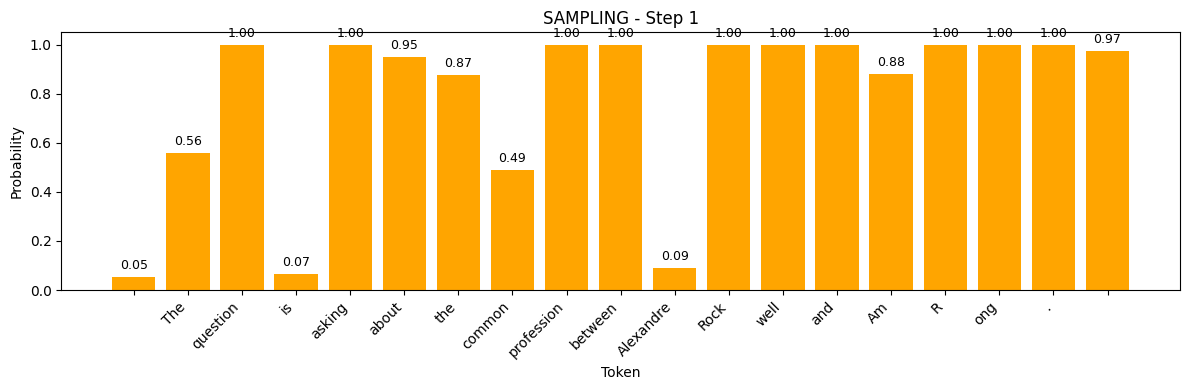

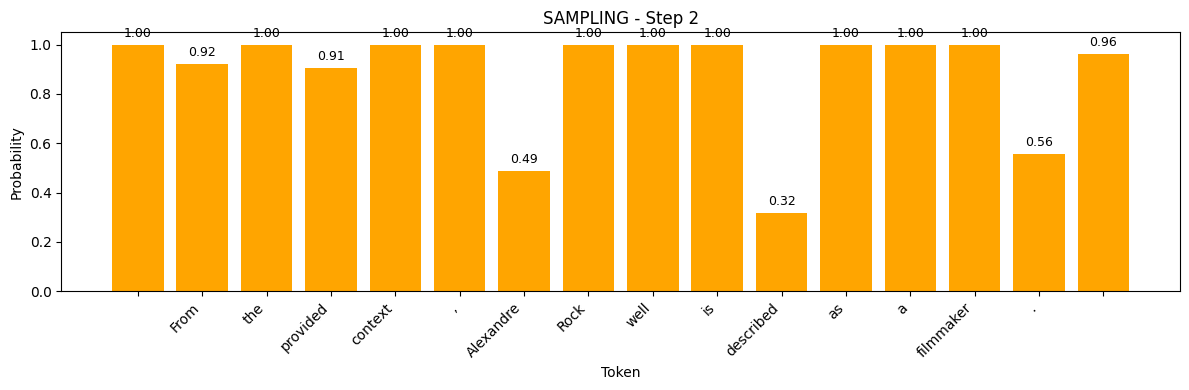

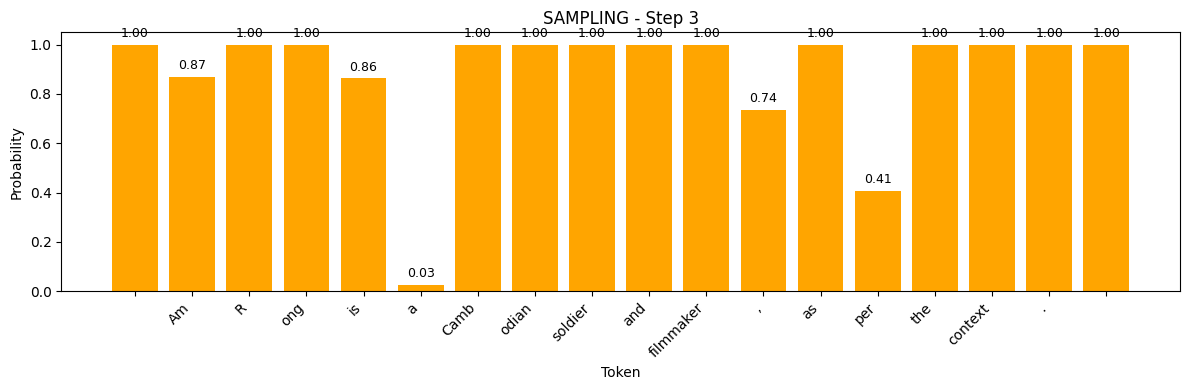

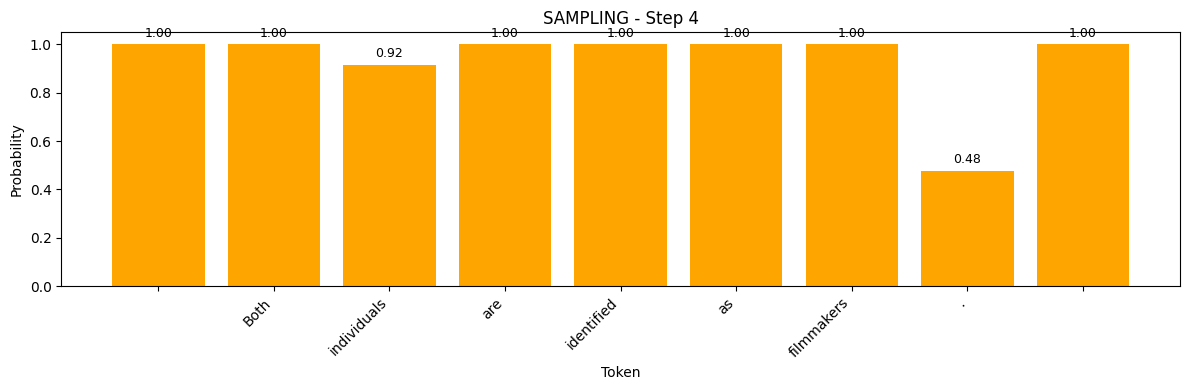

<ipython-input-37-a119ebd5c0d4>:24: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


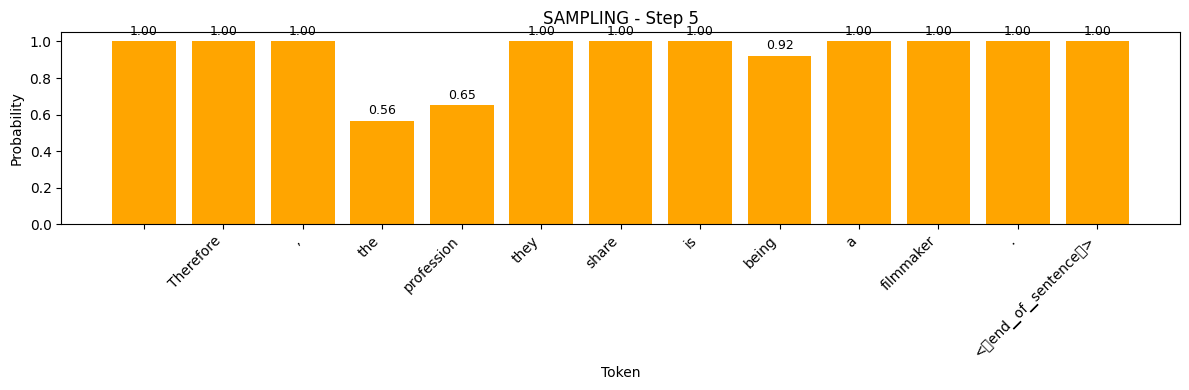

In [ ]:
example_id = "5abf037a5542993fe9a41dbe"
plot_all_steps(data, example_id, mode="sampling")  # 或 mode="beam"/"sampling"


In [ ]:
import json
import re
from collections import defaultdict

def extract_steps_from_token_probs(token_probs):
    steps = defaultdict(list)
    current_step = None
    i = 0
    while i < len(token_probs):
        token, prob = token_probs[i]
        if token == "Step":
            for j in range(1, 4):
                if i + j < len(token_probs):
                    next_token = token_probs[i + j][0]
                    if re.fullmatch(r"\d+", next_token):
                        current_step = int(next_token)
                        i += j + 1
                        break
            else:
                i += 1
                continue
            continue
        if current_step is not None:
            steps[current_step].append({"token": token, "prob": prob})
        i += 1
    return dict(steps)



In [ ]:
decode_modes = ["greedy", "beam", "sampling"]

for example_id, example in data.items():
    for mode in decode_modes:
        if mode in example and "token_probs" in example[mode]:
            token_probs = example[mode]["token_probs"]
            steps = extract_steps_from_token_probs(token_probs)
            example[f"{mode}_step_token_probs"] = steps


In [ ]:
with open("/content/drive/MyDrive/Cluster-proj/output/DeepSeek-7B-sample71-80_with_all_steps.json", "w") as f:
    json.dump(data, f, indent=2, ensure_ascii=False)